In [1]:
import numpy as np
import tensorflow as tf
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()

2024-03-18 01:14:16.251526: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-18 01:14:16.252050: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-18 01:14:16.255381: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-18 01:14:16.293027: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-18 01:14:17.068459: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

In [2]:
x_train,x_test = x_train/255.0,x_test/255.0

In [3]:
# x_train,x_test = x_train[:1000],x_test[:500]
# y_train,y_test = y_train[:1000],y_test[:500]


In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

histroy = model.fit(x_train,y_train,epochs=5,validation_data=(x_test,y_test),
)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.3738 - loss: 1.7168 - val_accuracy: 0.5621 - val_loss: 1.2242
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6015 - loss: 1.1570 - val_accuracy: 0.6325 - val_loss: 1.0712
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6499 - loss: 0.9999 - val_accuracy: 0.6507 - val_loss: 1.0124
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6787 - loss: 0.9194 - val_accuracy: 0.6768 - val_loss: 0.9439
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7093 - loss: 0.8414 - val_accuracy: 0.6784 - val_loss: 0.9261


In [5]:
test_loss,test_acc = model.evaluate(x_test,y_test,verbose=2)
print("\n Test accurancy:",test_acc)

313/313 - 2s - 5ms/step - accuracy: 0.6852 - loss: 0.9752

 Test accurancy: 0.6851999759674072


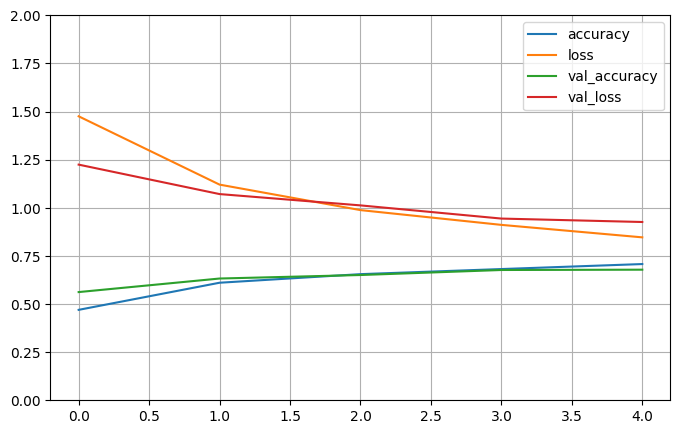

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(histroy.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,2)
plt.show()

In [10]:
print(model.layers)
print(model.summary())

[<Conv2D name=conv2d, built=True>, <MaxPooling2D name=max_pooling2d, built=True>, <Conv2D name=conv2d_1, built=True>, <MaxPooling2D name=max_pooling2d_1, built=True>, <Flatten name=flatten, built=True>, <Dense name=dense, built=True>, <Dense name=dense_1, built=True>]


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 502,688 (1.92 MB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 335,126 (1.28 MB)

None


In [19]:
model.save("my_keras.keras")
model2 = tf.keras.models.load_model("my_keras.keras")